In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dirty_cafe_sales.csv")

In [3]:
data

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [7]:
data.isnull().sum()/ len(data)*100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [8]:
print(data['Transaction ID'].duplicated().sum())

0


In [9]:
df=data.copy()

In [10]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [11]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [12]:
df['Item'].replace(['UNKNOWN','ERROR','nan'], np.nan, inplace=True)

In [13]:
df['Item'].fillna(df['Item'].mode()[0], inplace=True)

In [14]:
print(df['Item'].value_counts().sum())

10000


In [15]:
df['Item'].value_counts(normalize=True)*100

Item
Juice       21.40
Coffee      11.65
Salad       11.48
Cake        11.39
Sandwich    11.31
Smoothie    10.96
Cookie      10.92
Tea         10.89
Name: proportion, dtype: float64

In [16]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Juice',
       'Sandwich', 'Tea'], dtype=object)

In [17]:
df['Item'].shape

(10000,)

In [18]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [19]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [20]:
df['Quantity'].replace(['ERROR','UNKNOWN'], np.nan, inplace= True)

In [21]:
df['Quantity'].fillna(df['Quantity'].mode()[0], inplace=True)

In [22]:
df['Quantity']=df['Quantity'].astype(int)

In [23]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          10000 non-null  int64 
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [25]:
df['Price Per Unit'].unique()

array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [26]:
df['Price Per Unit'].replace(["nan", 'ERROR', 'UNKNOWN'],np.nan, inplace=True)

In [27]:
df['Price Per Unit']=df['Price Per Unit'].astype(float)

In [28]:
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(),inplace=True)

In [29]:
df['Price Per Unit'].unique()

array([2.        , 3.        , 1.        , 5.        , 4.        ,
       1.5       , 2.94998416])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       9827 non-null   object 
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [31]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [32]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [33]:
df['Total Spent'].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [34]:
df['Total Spent'].replace(['ERROR','UNKNOWN','nan'], np.nan, inplace=True)

In [35]:
df['Total Spent']= df['Total Spent'].astype(float)

In [36]:
 df['Total Spent'].fillna(df['Total Spent'].median() , inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [38]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [39]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [40]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [41]:
df['Payment Method'].replace(['ERROR','UNKNOWN','nan'], np.nan,inplace=True)


In [42]:
df['Payment Method'].ffill(inplace=True)

In [64]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [44]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [45]:
df['Location'].replace(['UNKNOWN','ERROR','nan'],np.nan, inplace=True)

In [46]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

In [63]:
df['Transaction Date'].unique()

<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 365, dtype: datetime64[ns]

In [48]:
df['Transaction Date'].replace(['UNKNOWN','ERROR','nan'], np.nan, inplace=True)

In [49]:
df['Transaction Date'].ffill(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [51]:
# df['Transaction Date'].astype(np.datetime64)
df['Transaction Date']= pd.to_datetime(df['Transaction Date'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  int64         
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


In [53]:
df.isnull().value_counts()

Transaction ID  Item   Quantity  Price Per Unit  Total Spent  Payment Method  Location  Transaction Date
False           False  False     False           False        False           False     False               10000
Name: count, dtype: int64

In [54]:
for i in df.columns:
    print(df[i].unique())
    print("-"*30)

['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
------------------------------
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Juice' 'Sandwich' 'Tea']
------------------------------
[2 4 5 3 1]
------------------------------
[2.         3.         1.         5.         4.         1.5
 2.94998416]
------------------------------
[ 4.  12.   8.  10.  20.   9.  16.  15.  25.   5.   3.   6.   2.   1.
  7.5  4.5  1.5]
------------------------------
['Credit Card' 'Cash' 'Digital Wallet']
------------------------------
['Takeaway' 'In-store']
------------------------------
<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 0

In [55]:
df['Total Spent'].shape

(10000,)

In [56]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,10000.000000,10000.000000,10000.00000,10000
mean,3.122900,2.949984,8.87795,2023-07-02 00:30:31.680000256
min,1.000000,1.000000,1.00000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.00000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.00000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.00000,2023-10-02 00:00:00
max,5.000000,5.000000,25.00000,2023-12-31 00:00:00
std,1.447206,1.243910,5.86059,NaN


8.0


<Axes: ylabel='Total Spent'>

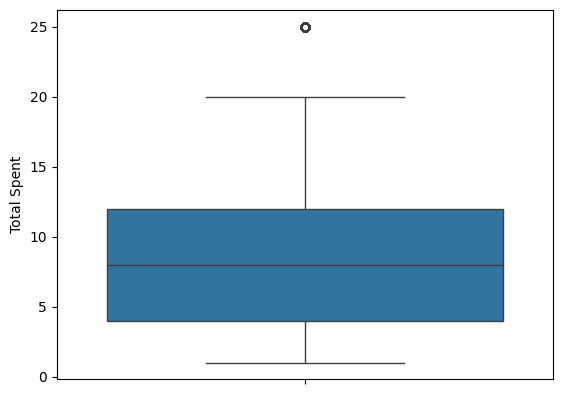

In [57]:
print(df['Total Spent'].median())
sns.boxplot(df['Total Spent'])

In [58]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df['Total Spent'] >= lower) & (df['Total Spent'] <= upper)]
df_clean.shape

(9741, 8)

In [59]:
df['Total Spent'].value_counts()

Total Spent
8.0     1179
6.0      979
12.0     939
3.0      930
4.0      923
20.0     746
15.0     734
10.0     524
2.0      497
9.0      479
5.0      468
16.0     444
25.0     259
7.5      237
1.0      232
4.5      225
1.5      205
Name: count, dtype: int64

<Axes: ylabel='Price Per Unit'>

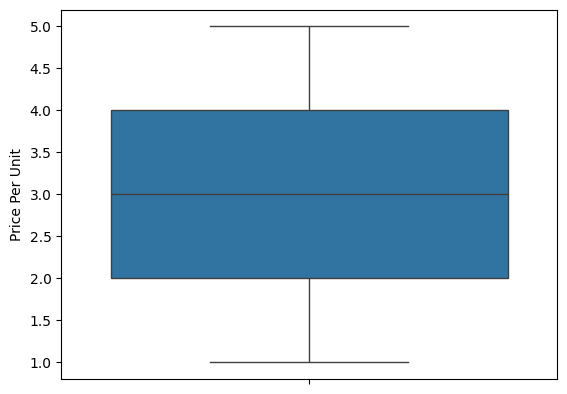

In [60]:
sns.boxplot(df['Price Per Unit'])

<Axes: ylabel='Quantity'>

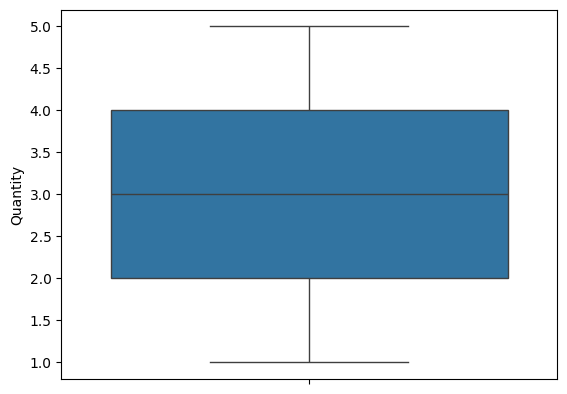

In [61]:
sns.boxplot(df['Quantity'])

In [65]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,Credit Card,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


<BarContainer object of 3 artists>

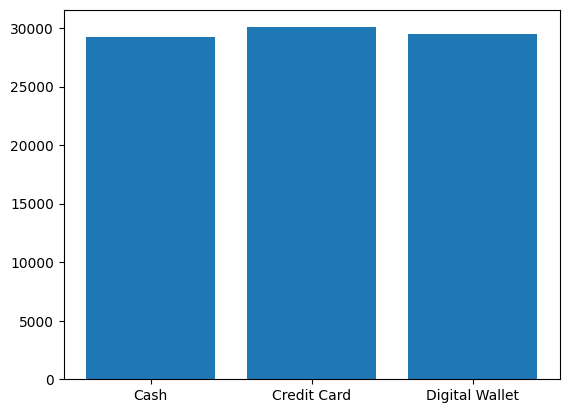

In [85]:
gp=df.groupby('Payment Method')['Total Spent'].sum()
plt.bar(gp.index, gp.values)
# plt.plot(df['Quantity'])

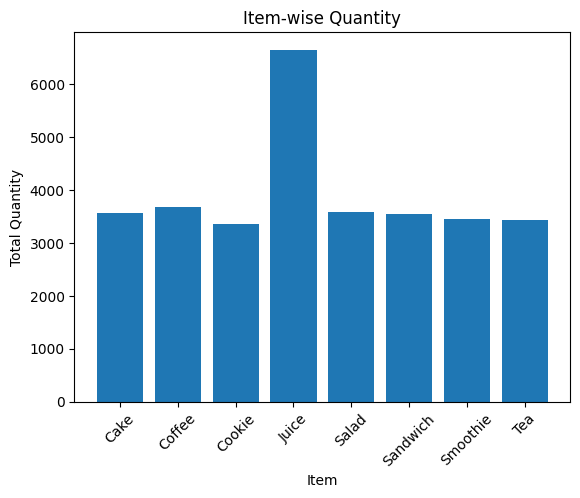

In [88]:
item_qty = df.groupby('Item')['Quantity'].sum()

plt.bar(item_qty.index, item_qty.values)
plt.xlabel('Item')
plt.ylabel('Total Quantity')
plt.title('Item-wise Quantity')
plt.xticks(rotation=45)
plt.show()



[]

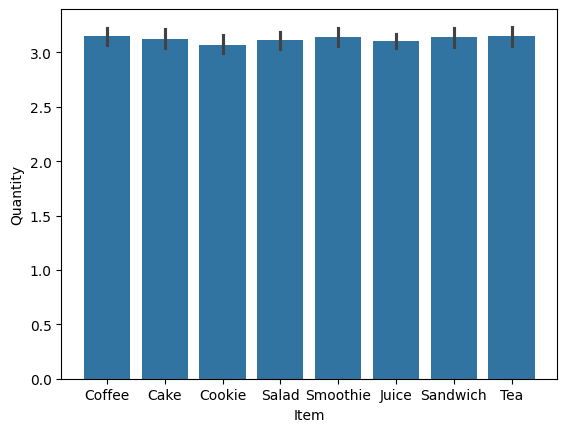

In [100]:
sns.barplot( data= df, x='Item', y= 'Quantity')
plt.plot()